In [1]:
## In the thesis, there are 20 currencies, period=1983.11-2012.09, 
## ccy: Australia, Austria, Belgium , Canada, Denmark, Euro area, France, Germany, Ireland, Italy, Japan, Netherlands, New Zealand, Norway, Portugal, Spain, Sweden, Switzerland, United Kindom

## Raw Data cleaning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
country_l = ['Australia'	, 'Austria'	, 'Belgium'	, 'Brazil'	, 'Bulgaria'	, 'Canada'	, 'Croatia'	, 'Cyprus'	, 'Czech Republic'	, 'Denmark'	, 'Egypt'	, 'Euro area'	, 'Finland'	, 'France'	, 'Germany'	, 'Greece'	, 'Hong Kong'	, 'Hungary'	, 'India'	, 'Indonesia'	, 'Ireland'	, 'Israel'	, 'Italy'	, 'Iceland'	, 'Japan'	, 'Kuwait'	, 'Malaysia'	, 'Mexico'	, 'Netherlands'	, 'New Zealand'	, 'Norway'	, 'Philippines,'	, 'Poland'	, 'Portugal'	, 'Russia'	, 'Saudi Arabia'	, 'Singapore'	, 'Slovakia'	, 'Slovenia'	, 'South Africa'	, 'South KOREA'	, 'Spain'	, 'Sweden'	, 'Switzerland'	, 'Taiwan'	, 'Thailand'	, 'Ukraine'	, 'United Kingdom'
]

In [4]:
carryPortCountry = ['Australia', 'Austria', 'Belgium' , 'Canada', 'Denmark', 'Euro area', 'France', 'Germany', 
                  'Ireland', 'Italy', 'Japan', 'Netherlands', 'New Zealand', 'Norway', 'Portugal', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom']

In [5]:
# raw data
swapRaw = pd.read_csv('swapRawData0305.csv')
spotRaw = pd.read_csv('spotRawData0305.csv')

newSpot = spotRaw.copy()
newSwap = swapRaw.copy()

# first use the thesis period
dateRange = pd.date_range(start='1983-11-01', end='2022-12-30')
newSpot = pd.DataFrame(index=dateRange)
newSwap = pd.DataFrame(index=dateRange)

for i in range(spotRaw.shape[1]):
    if i % 2 == 0:
        tmpDf = spotRaw.iloc[:, i:i+2]
        tmpDf.dropna(inplace=True)
        tmpDf.index = tmpDf.iloc[:, 0]
        tmpDf = tmpDf.iloc[:, 1:2]
        tmpDf.index = (dt.datetime.strptime(str(i), "%Y/%m/%d") for i in tmpDf.index)
        # tmpDf = tmpDf[ tmpDf.index > dt.datetime(2009, 2, 8) ]
        tmpDf = tmpDf.iloc[::-1]
        
        newSpot[tmpDf.columns.values[0]] = tmpDf[tmpDf.columns.values[0]] # merge the data into newSpot

for i in range(swapRaw.shape[1]):
    if i % 2 == 0:
        tmpDf = swapRaw.iloc[:, i:i+2]
        tmpDf.dropna(inplace=True)
        tmpDf.index = tmpDf.iloc[:, 0]
        tmpDf = tmpDf.iloc[:, 1:2]
        tmpDf.index = (dt.datetime.strptime(str(i), "%Y/%m/%d") for i in tmpDf.index)
        # tmpDf = tmpDf[ tmpDf.index > dt.datetime(2009, 2, 8) ]
        tmpDf = tmpDf.iloc[::-1]
        
        newSwap[tmpDf.columns.values[0]] = tmpDf[tmpDf.columns.values[0]] # merge the data into newSpot

# newSpot = newSpot.fillna(method='bfill')
newSpot.columns =  country_l

C:\Users\User\AppData\Local\Temp\ipykernel_25548\4191785866.py:2: DtypeWarning: Columns (2,4,6,8,12,14,16,20,22,24,26,28,30,34,36,38,40,42,44,46,50,52,54,56,58,62,64,66,68,70,72,74,76,80,82,88,90,92) have mixed types. Specify dtype option on import or set low_memory=False.
  swapRaw = pd.read_csv('swapRawData0305.csv')
C:\Users\User\AppData\Local\Temp\ipykernel_25548\4191785866.py:3: DtypeWarning: Columns (6,8,12,14,16,20,34,38,46,62,64,68,74,76,92) have mixed types. Specify dtype option on import or set low_memory=False.
  spotRaw = pd.read_csv('spotRawData0305.csv')


In [6]:
# snewSwap = newSwap.fillna(method='bfill')
newSwap.columns =  country_l

In [7]:
newSwap.isnull().values.any()

True

### Convert the pip value and get forward

In [8]:
# converge the swap point
# pipVal = [0.0001, 0.0001, 0.001, 0.0001, 0.0001	,0.0001	,0.0001	,0.0001	,0.001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.01, 0.0001, 0.01, 0.0001, 1, 0.0001, 0.0001, 0.01, 0.01, 0.01, 0.00001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.001, 0.0001, 0.01, 0.0001, 0.0001, 0.0001, 0.001, 0.01	,0.0001	, 0.01	,0.01	, 0.0001	, 0.0001	, 0.001	, 0.01	, 0.0001	, 0.0001]
pipVal = [0.0001, 0.001, 0.001, 0.0001,	0.0001,	0.0001,	0.0001,	0.0001,	0.001,	0.0001,	0.0001,	0.0001,	0.0001,	0.0001,	0.0001,	0.0001,	0.0001,	0.01,	0.01,	1,	0.01,	0.0001,	1,	0.01,	0.01,	0.00001,	0.0001,	0.01,	0.0001,	0.0001,	0.0001,	1,	0.0001,	0.01,	0.0001,	0.0001,	0.0001,	0.001,	0.01,	0.0001,	0.01,	0.01,	0.0001,	0.0001,	1,	0.001,	0.0001,	0.0001]

country_l = ['Australia'	, 'Austria'	, 'Belgium'	, 'Brazil'	, 'Bulgaria'	, 'Canada'	, 'Croatia'	, 'Cyprus'	, 'Czech Republic'	, 'Denmark'	, 'Egypt'	, 'Euro area'	, 'Finland'	, 'France'	, 'Germany'	, 'Greece'	, 'Hong Kong'	, 'Hungary'	, 'India'	, 'Indonesia'	, 'Ireland'	, 'Israel'	, 'Italy'	, 'Iceland'	, 'Japan'	, 'Kuwait'	, 'Malaysia'	, 'Mexico'	, 'Netherlands'	, 'New Zealand'	, 'Norway'	, 'Philippines,'	, 'Poland'	, 'Portugal'	, 'Russia'	, 'Saudi Arabia'	, 'Singapore'	, 'Slovakia'	, 'Slovenia'	, 'South Africa'	, 'South KOREA'	, 'Spain'	, 'Sweden'	, 'Switzerland'	, 'Taiwan'	, 'Thailand'	, 'Ukraine'	, 'United Kingdom'
]

count = 0
for i in newSwap.columns:
    try:
            # print(i, pipVal[count])
            tmpPip = pipVal[count]
            newSwap[i] = newSwap[i] * tmpPip
            count += 1
    except Exception as e:
            print(type(tmpPip))
            pass


In [9]:
newSpot = newSpot.astype(float)
newSwap = newSwap.astype(float)
fwd = newSpot + newSwap

In [10]:
fwd.tail(100)

,Australia,Austria,Belgium,Brazil,Bulgaria,Canada,Croatia,Cyprus,Czech Republic,Denmark,...,Slovenia,South Africa,South KOREA,Spain,Sweden,Switzerland,Taiwan,Thailand,Ukraine,United Kingdom
2022-09-22,1.508329,13.95597,40.913485,5.207040,1.981901,1.346356,7.627914,0.593550,25.13919,7.541919,...,243.047145,17.7908,1395.7785,168.75165,11.057758,0.963955,31.4035,37.17731,36.826980,0.887324
2022-09-23,1.504924,13.95876,40.921867,5.151944,1.983849,1.348771,7.630899,0.593705,25.14690,7.543135,...,243.097107,17.6474,1412.8105,168.78635,11.056715,0.975664,31.5480,37.35775,36.935988,0.888032
2022-09-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-26,1.531898,14.17335,41.550781,5.300900,2.013574,1.359263,7.740096,0.602879,25.49205,7.659447,...,246.833001,17.9992,1409.7215,171.38028,11.286825,0.979243,31.6665,37.55790,36.720772,0.920912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,1.487885,12.92562,37.892935,5.190550,NaN,1.359660,NaN,0.549816,22.82930,6.984090,...,225.103890,17.0717,1281.1810,156.29330,10.502800,0.929687,30.6335,34.80200,36.921251,0.829678
2022-12-27,1.486558,12.90161,37.822503,5.246683,NaN,1.357966,7.073302,0.548720,22.78360,6.971100,...,224.685286,17.0551,1274.7900,156.00270,10.472045,0.928466,30.6105,34.70087,36.927959,0.829059
2022-12-28,1.485454,12.89946,37.816375,5.319434,1.837320,1.352061,7.066914,0.548673,22.82270,6.969826,...,224.648896,17.2592,1270.9190,155.97745,10.444985,0.925628,30.6250,34.63490,36.937267,0.831610
2022-12-29,1.484352,12.93440,37.918693,5.293730,1.838227,1.360580,7.084685,0.550135,22.84280,6.987950,...,225.256557,17.1621,1267.6340,156.39935,10.451246,0.925642,30.6730,34.79200,36.920771,0.832095


In [11]:
# get the carry data
carry = (newSpot-fwd)/fwd

In [12]:
carry = carry.loc[ carry.index.is_month_end == True]
carry = carry.shift(1)
carry = carry.iloc[1:, ]

In [13]:
carry.tail(100)

,Australia,Austria,Belgium,Brazil,Bulgaria,Canada,Croatia,Cyprus,Czech Republic,Denmark,...,Slovenia,South Africa,South KOREA,Spain,Sweden,Switzerland,Taiwan,Thailand,Ukraine,United Kingdom
2014-08-31,0.000005,0.000099,0.000099,-0.008579,-0.000089,-0.000678,-0.000313,0.000103,0.000231,0.000199,...,0.000099,-0.005237,-0.000017,0.000099,-0.000134,0.000207,0.000133,-0.000154,-0.000101,0.000039
2014-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-31,0.000004,0.000219,0.000219,-0.008924,-0.000251,-0.000732,-0.000457,0.000217,0.000343,0.000170,...,0.000219,-0.005414,-0.000015,0.000219,-0.000130,0.000262,0.000262,-0.000156,-0.000112,0.000036
2014-11-30,0.000005,0.000186,0.000186,-0.009110,0.000126,-0.000727,-0.000374,0.000183,0.000258,0.000179,...,0.000186,-0.004907,-0.000012,0.000186,0.000065,0.000219,0.000313,-0.000134,-0.000109,0.000040
2014-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31,-0.000036,0.001988,0.001988,-0.008580,0.001973,-0.000049,0.001822,0.001988,-0.004367,0.002044,...,0.001988,-0.003211,0.000004,0.001988,0.001017,0.001889,0.000833,0.000136,-0.000103,-0.000023
2022-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-30,-0.000020,0.002106,0.002106,-0.007814,0.002089,-0.000325,0.001876,0.002106,-0.003914,0.002091,...,0.002106,-0.003000,0.000005,0.002106,0.001533,0.002524,0.001481,0.000172,-0.000103,-0.000017
2022-10-31,-0.000028,0.002130,0.002130,-0.007464,0.002159,-0.000108,0.002287,0.002131,-0.003330,0.002161,...,0.002130,-0.002724,0.000004,0.002130,0.001386,0.002668,0.001612,0.000121,-0.000102,-0.000016


### Get monthly carry and excess return

In [14]:
fwd = fwd.loc[ fwd.index.is_month_end == True]
newSpot = newSpot.loc[ newSpot.index.is_month_end == True]
fwdShift = fwd.shift(1)
fwdShift = fwdShift.iloc[1:, ]
newSpot = newSpot.iloc[1:, ]
excessReturn = np.log(fwdShift)-np.log(newSpot)

c:\Users\User\Anaconda3\envs\currPredict\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [15]:
carryPort = pd.DataFrame(index=carry.index, columns=carryPortCountry)
for i in carryPortCountry:
    carryPort[i] = carry[i]
carryPort = carryPort.shift(1)
carryPort = carryPort.iloc[1:, ]

carry = carryPort.copy() 

In [16]:
carry

,Australia,Austria,Belgium,Canada,Denmark,Euro area,France,Germany,Ireland,Italy,Japan,Netherlands,New Zealand,Norway,Portugal,Spain,Sweden,Switzerland,United Kingdom
1984-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984-03-31,0.000030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984-04-30,0.000009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31,-0.000020,0.001486,0.001486,-0.000202,0.001484,-0.001484,0.001486,0.001486,-0.001459,0.174261,0.001178,0.001486,0.000020,0.000236,0.001486,0.001486,0.000939,0.001576,-0.000093
2022-08-31,-0.000036,0.001988,0.001988,-0.000049,0.002044,-0.001984,0.001988,0.001988,-0.001957,0.247467,0.001760,0.001988,0.000032,0.000441,0.001988,0.001988,0.001017,0.001889,-0.000023
2022-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-31,-0.000020,0.002106,0.002106,-0.000325,0.002091,-0.002101,0.002106,0.002106,-0.002119,0.266148,0.002567,0.002106,0.000108,0.000548,0.002106,0.002106,0.001533,0.002524,-0.000017


rebalance once a month 
portfwd = portfwd.loc[ portfwd.index.is_month_end == True]
portfwd =m portfwd.shift(1)

## Rank the carry

In [17]:
# about rank() fcn: https://zhuanlan.zhihu.com/p/87593543
# weight = z(rank(C)-((N+1)/2) )
rank = pd.DataFrame(index=carry.index, columns=carry.columns)
for i in carry.index:
    rank.loc[i, :] = carry.loc[i, :].rank(method='max', na_option='top', ascending=False)
    

In [18]:
rank

,Australia,Austria,Belgium,Canada,Denmark,Euro area,France,Germany,Ireland,Italy,Japan,Netherlands,New Zealand,Norway,Portugal,Spain,Sweden,Switzerland,United Kingdom
1984-01-31,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
1984-02-29,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
1984-03-31,19.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0
1984-04-30,19.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0
1984-05-31,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31,15.0,9.0,5.0,17.0,10.0,19.0,6.0,3.0,18.0,1.0,11.0,7.0,14.0,13.0,8.0,4.0,12.0,2.0,16.0
2022-08-31,16.0,9.0,6.0,17.0,2.0,19.0,7.0,3.0,18.0,1.0,11.0,8.0,14.0,13.0,4.0,5.0,12.0,10.0,15.0
2022-09-30,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
2022-10-31,16.0,10.0,6.0,17.0,11.0,18.0,5.0,9.0,19.0,1.0,2.0,8.0,14.0,13.0,4.0,7.0,12.0,3.0,15.0


In [19]:
import math

In [20]:
# count for each period's portfolio currency number
n = pd.Series()
for i in rank.index:
    count = 0
    s = rank.loc[i] # convert to a series
    for j in s:
        if math.isnan(j) != True:
            count += 1
    n[i] = count

C:\Users\User\AppData\Local\Temp\ipykernel_25548\388856601.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  n = pd.Series()


In [21]:
n = (n+1)/2

In [22]:
n

1984-01-31    10.0
1984-02-29    10.0
1984-03-31    10.0
1984-04-30    10.0
1984-05-31    10.0
              ... 
2022-07-31    10.0
2022-08-31    10.0
2022-09-30    10.0
2022-10-31    10.0
2022-11-30    10.0
Length: 467, dtype: float64

In [23]:
(rank.loc['2012-09-30 ']-n['2012-09-30']).sum()

0.0

In [24]:
for i in rank.index:
    rank.loc[i] = rank.loc[i]-n[i]

In [25]:
tmp = rank.iloc[:, 0:18]
tmp.loc['2012-09-30']

Australia      4.0
Austria       -6.0
Belgium       -4.0
Canada         7.0
Denmark       -8.0
Euro area      6.0
France        -5.0
Germany        0.0
Ireland        5.0
Italy         -9.0
Japan          1.0
Netherlands   -1.0
New Zealand    3.0
Norway         8.0
Portugal      -2.0
Spain         -3.0
Sweden         9.0
Switzerland   -7.0
Name: 2012-09-30 00:00:00, dtype: object

In [26]:
for i in rank.index:
    zt = 0
    posSum = 0
    for j in rank.columns:

        countryRank = rank.loc[i, j]
        if  countryRank > 0:
            posSum += countryRank
    if posSum != 0:
        zt = 1/posSum
    else: # posSum = 0
        pass
    rank.loc[i, 'Z_t'] = zt

In [27]:
rank

,Australia,Austria,Belgium,Canada,Denmark,Euro area,France,Germany,Ireland,Italy,Japan,Netherlands,New Zealand,Norway,Portugal,Spain,Sweden,Switzerland,United Kingdom,Z_t
1984-01-31,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,0.005848
1984-02-29,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,0.005848
1984-03-31,9.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,0.006536
1984-04-30,9.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,0.006536
1984-05-31,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,0.005848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31,5.0,-1.0,-5.0,7.0,0.0,9.0,-4.0,-7.0,8.0,-9.0,1.0,-3.0,4.0,3.0,-2.0,-6.0,2.0,-8.0,6.0,0.022222
2022-08-31,6.0,-1.0,-4.0,7.0,-8.0,9.0,-3.0,-7.0,8.0,-9.0,1.0,-2.0,4.0,3.0,-6.0,-5.0,2.0,0.0,5.0,0.022222
2022-09-30,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,0.005848
2022-10-31,6.0,0.0,-4.0,7.0,1.0,8.0,-5.0,-1.0,9.0,-9.0,-8.0,-2.0,4.0,3.0,-6.0,-3.0,2.0,-7.0,5.0,0.022222


In [28]:
rank.loc['2012-09-30'].iloc[0:18]*rank.loc['2012-09-30'].iloc[-1]

Australia      0.088889
Austria       -0.133333
Belgium       -0.088889
Canada         0.155556
Denmark       -0.177778
Euro area      0.133333
France        -0.111111
Germany             0.0
Ireland        0.111111
Italy              -0.2
Japan          0.022222
Netherlands   -0.022222
New Zealand    0.066667
Norway         0.177778
Portugal      -0.044444
Spain         -0.066667
Sweden              0.2
Switzerland   -0.155556
Name: 2012-09-30 00:00:00, dtype: object

In [29]:

rank.loc['2012-09-30']

Australia              4.0
Austria               -6.0
Belgium               -4.0
Canada                 7.0
Denmark               -8.0
Euro area              6.0
France                -5.0
Germany                0.0
Ireland                5.0
Italy                 -9.0
Japan                  1.0
Netherlands           -1.0
New Zealand            3.0
Norway                 8.0
Portugal              -2.0
Spain                 -3.0
Sweden                 9.0
Switzerland           -7.0
United Kingdom         2.0
Z_t               0.022222
Name: 2012-09-30 00:00:00, dtype: object

In [30]:

rank.loc['2012-09-30'].iloc[-1]

0.022222222222222223

In [31]:
rank.loc['2012-09-30'].iloc[0:18]

Australia      4.0
Austria       -6.0
Belgium       -4.0
Canada         7.0
Denmark       -8.0
Euro area      6.0
France        -5.0
Germany        0.0
Ireland        5.0
Italy         -9.0
Japan          1.0
Netherlands   -1.0
New Zealand    3.0
Norway         8.0
Portugal      -2.0
Spain         -3.0
Sweden         9.0
Switzerland   -7.0
Name: 2012-09-30 00:00:00, dtype: object

## Get weights 

In [32]:
rank.loc[i].iloc[0:19]*s.iloc[-1]

Australia         20.0
Austria           -8.0
Belgium           -4.0
Canada            24.0
Denmark          -24.0
Euro area         32.0
France             0.0
Germany          -20.0
Ireland           36.0
Italy            -36.0
Japan            -32.0
Netherlands      -12.0
New Zealand       28.0
Norway            12.0
Portugal         -16.0
Spain              4.0
Sweden             8.0
Switzerland      -28.0
United Kingdom    16.0
Name: 2022-11-30 00:00:00, dtype: object

In [33]:
weights = pd.DataFrame(index=rank.index, columns=carryPortCountry)
for i in weights.index:
    s = rank.loc[i]
    if s.iloc[-1] != 0: # if zt is not equal to 0
        weights.loc[i, :] = s.iloc[0:19]*s.iloc[-1]


In [34]:
weights.loc['2012-09-30	', :].sum()

-3.469446951953614e-17

In [35]:
er = pd.DataFrame(index=excessReturn.index, columns=carryPortCountry)
for i in carryPortCountry:
    er[i] = excessReturn[i]

## Caluclate portfolio return (excess return * weights)

In [36]:
carryPortRet = er * weights

In [37]:
carryPortRet['Port_Ret'] = carryPortRet.sum(axis=1)

In [38]:
carryPortRet

,Australia,Austria,Belgium,Canada,Denmark,Euro area,France,Germany,Ireland,Italy,Japan,Netherlands,New Zealand,Norway,Portugal,Spain,Sweden,Switzerland,United Kingdom,Port_Ret
1983-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1984-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1984-02-29,0.00175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001750
1984-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1984-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2022-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2022-09-30,-0.00279,-0.001168,-0.001168,-0.002291,-0.001156,0.001172,-0.001169,-0.001167,0.001169,-0.013478,-0.002242,-0.001167,-0.003576,-0.004579,-0.001168,-0.001168,-0.002354,-0.000203,-0.002491,-0.040994
2022-10-31,-0.001835,0.0,-0.001157,0.000975,0.000265,-0.002318,-0.001447,-0.000289,-0.002593,0.044767,0.00435,-0.000578,0.001259,0.002337,-0.001735,-0.000868,0.000781,0.003602,0.004871,0.050388


In [39]:
carryPortRet['Cum_ret'] = (1 + carryPortRet['Port_Ret']).cumprod() - 1

In [40]:
carryPortRet

,Australia,Austria,Belgium,Canada,Denmark,Euro area,France,Germany,Ireland,Italy,...,Netherlands,New Zealand,Norway,Portugal,Spain,Sweden,Switzerland,United Kingdom,Port_Ret,Cum_ret
1983-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
1984-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
1984-02-29,0.00175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001750,0.001750
1984-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.001750
1984-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.001750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.921197
2022-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.921197
2022-09-30,-0.00279,-0.001168,-0.001168,-0.002291,-0.001156,0.001172,-0.001169,-0.001167,0.001169,-0.013478,...,-0.001167,-0.003576,-0.004579,-0.001168,-0.001168,-0.002354,-0.000203,-0.002491,-0.040994,1.801445
2022-10-31,-0.001835,0.0,-0.001157,0.000975,0.000265,-0.002318,-0.001447,-0.000289,-0.002593,0.044767,...,-0.000578,0.001259,0.002337,-0.001735,-0.000868,0.000781,0.003602,0.004871,0.050388,1.942605


In [41]:
carryPortRet['Dollar Investing'] = 1
carryPortRet.loc[carryPortRet.index[0], 'Dollar Investing'] = 1

tmp = 0
for i in carryPortRet.index:
    if tmp == 0:
        tmp += 1
        pass
    else:
        next = carryPortRet.loc[i, 'Dollar Investing']
        update = carryPortRet.loc[carryPortRet.index[tmp-1], 'Dollar Investing']
        next = update*(1+carryPortRet.loc[carryPortRet.index[tmp-1], 'Port_Ret'])
        carryPortRet.loc[i, 'Dollar Investing'] = next
        tmp += 1

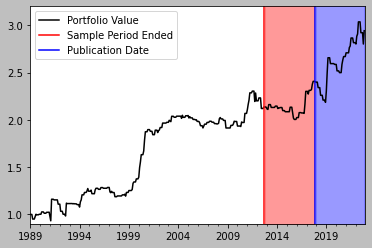

In [48]:
plt.style.use('grayscale')

fig, ax = plt.subplots()
carryPortRet['Dollar Investing'].plot(label='Portfolio Value')
plt.axvline(x = '2012-09-30', color = 'r', label = 'Sample Period Ended')
plt.axvline(x = '2017-11-30', color = 'b', label = 'Publication Date')
plt.legend(loc='best')
ax.set_xlim([dt.date(1989, 1, 1), dt.date(2022, 12, 30)])
ax.set_ylim([0.90, 3.2])    

postSam = '2012-09-30'
postPub = '2017-11-30'
ax.fill_between(carryPortRet.index, 0.90, 3.2, where= (carryPortRet.index > postSam) & (carryPortRet.index < postPub),  color='red', alpha=0.4)
ax.fill_between(carryPortRet.index, 0.90, 3.2, where= carryPortRet.index > postPub,  color='blue', alpha=0.4)

plt.savefig('writing/pics/carryCum.png', dpi=300)
plt.show()
plt.close()

In [43]:
carryPortRet['beta1'] = 0
carryPortRet['beta2'] = 0
for i in carryPortRet.index:
    if (i < dt.datetime(2012, 9, 30) ):
        carryPortRet.loc[i, 'beta1'] = 0
    elif (i > dt.datetime(2012, 9, 30) ) and (i < dt.datetime(2017, 11, 30) ):
        carryPortRet.loc[i, 'beta1'] = 1
    elif i > dt.datetime(2017, 11, 30):
        carryPortRet.loc[i, 'beta2'] = 1
    else:
        carryPortRet.loc[i, 'beta2'] = 0


In [44]:
carryPortRet

,Australia,Austria,Belgium,Canada,Denmark,Euro area,France,Germany,Ireland,Italy,...,Portugal,Spain,Sweden,Switzerland,United Kingdom,Port_Ret,Cum_ret,Dollar Investing,beta1,beta2
1983-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,0,0
1984-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,0,0
1984-02-29,0.00175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.001750,0.001750,1.000000,0,0
1984-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.001750,1.001750,0,0
1984-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.001750,1.001750,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,1.921197,2.921197,0,1
2022-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,1.921197,2.921197,0,1
2022-09-30,-0.00279,-0.001168,-0.001168,-0.002291,-0.001156,0.001172,-0.001169,-0.001167,0.001169,-0.013478,...,-0.001168,-0.001168,-0.002354,-0.000203,-0.002491,-0.040994,1.801445,2.921197,0,1
2022-10-31,-0.001835,0.0,-0.001157,0.000975,0.000265,-0.002318,-0.001447,-0.000289,-0.002593,0.044767,...,-0.001735,-0.000868,0.000781,0.003602,0.004871,0.050388,1.942605,2.801445,0,1


In [45]:
# from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

reg_exp = 'Port_Ret ~ beta1+beta2'
nw_ols1 = smf.ols(formula=reg_exp, data=carryPortRet).fit(cov_type='HAC', cov_kwds={'maxlags':1}, use_t=True)

In [46]:
nw_ols1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Port_Ret   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.1239
Date:                Thu, 30 Mar 2023   Prob (F-statistic):              0.883
Time:                        05:48:03   Log-Likelihood:                 1160.4
No. Observations:                 468   AIC:                            -2315.
Df Residuals:                     465   BIC:                            -2302.
Df Model:                           2                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0024      0.001      2.154      0.032       0.000       0.005
beta1         -0.0003      0.002     -0.145      0.885      -0.005       0.004
beta2          0.0015      0.003      0.448      0.654      -0.005       0.008
==============================================================================
Omnibus:                      505.666   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47732.295
Skew:                           4.628   Prob(JB):                         0.00
Kurtosis:                      51.602   Cond. No.                         3.35
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 1 lags and without small sample correction
"""

In [47]:
nw_ols1.pvalues

Intercept    0.031718
beta1        0.885002
beta2        0.654384
dtype: float64